In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4


# EX1 Global Earthquakes

In [91]:
# read the file by using pandas
EarthquakeData=pd.read_csv("usgs_earthquakes.csv")
# use sort_values() to get the largest 50 earthquakes , and reset_index() to get only first 50
EarthquakeData50=EarthquakeData.sort_values("mag",ascending=False).head(50).reset_index(drop=True)


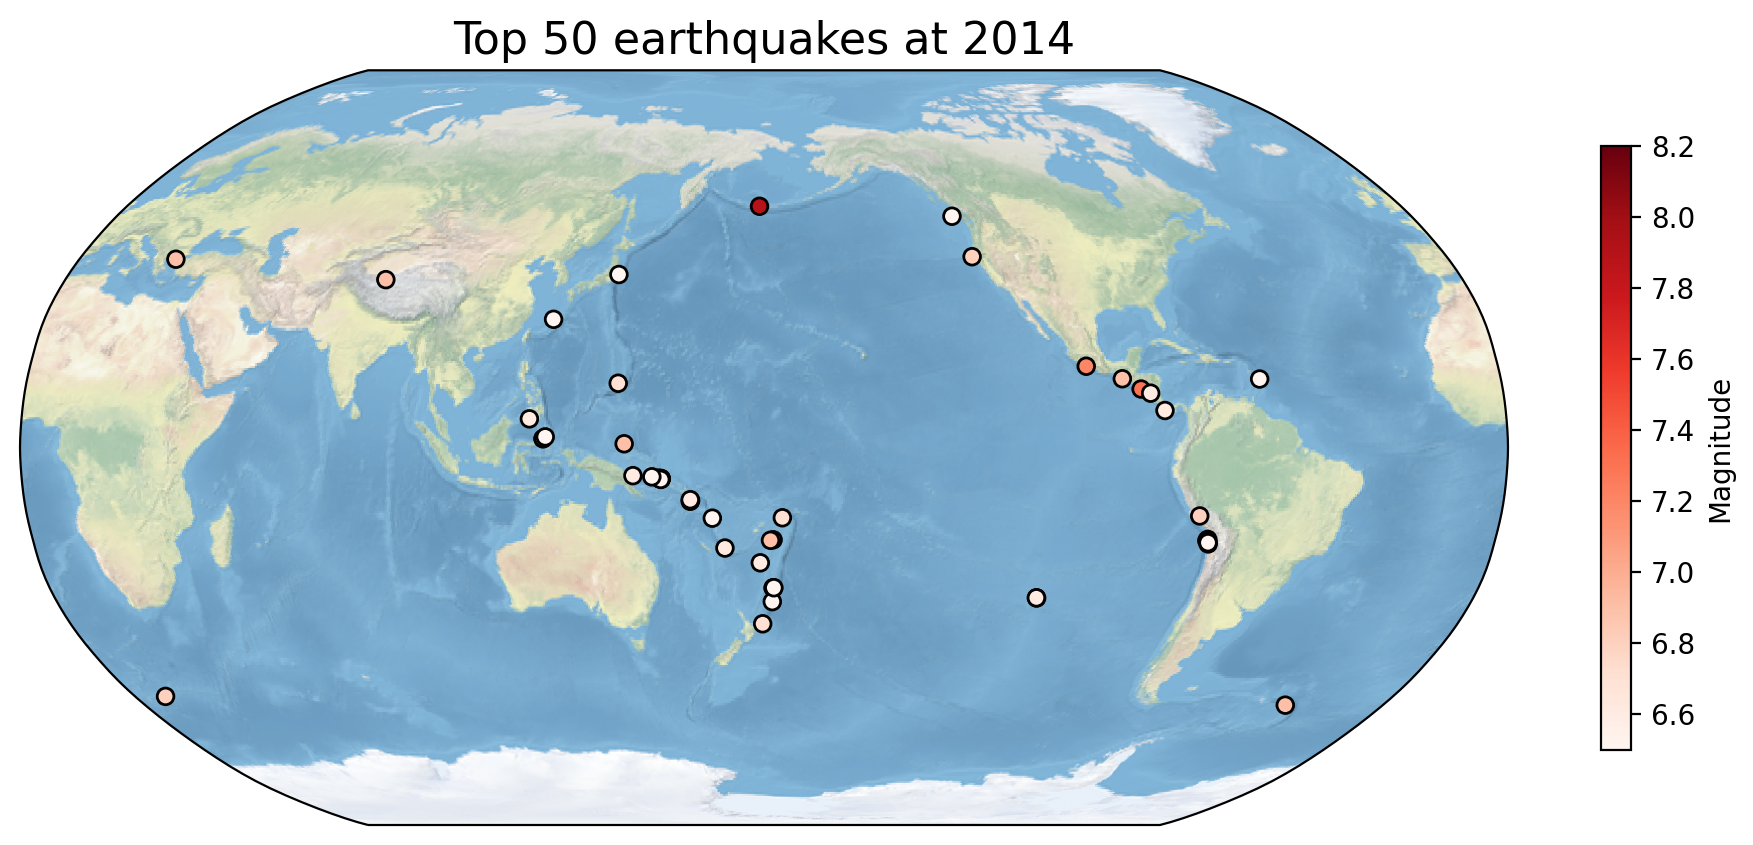

In [15]:
# create the figure object
plt.figure(figsize=(12,8),dpi=200)
# set the projection with pobison and
proj=ccrs.Robinson(central_longitude=180 , globe=None)
ax=plt.axes(projection=proj)
# using data from existing package in Natural Earth
ax.stock_img()
ax.set_global()
# plot the scatter plot of the largest 50 earthquakes
# first making a symbol of these data
x=EarthquakeData50["longitude"]
y=EarthquakeData50["latitude"]
Mag=EarthquakeData50["mag"]
plt.scatter(x,y,c=Mag,cmap="Reds",edgecolors="black",marker="o",transform=ccrs.PlateCarree())
#  set the scale and label of  colorbar
plt.colorbar(shrink=0.5,label="Magnitude")
# add title for the picture 
plt.title("Top 50 earthquakes at 2014",fontsize=16)
plt.show()

# EX2  Explore a netCDF dataset


In [32]:
# open the Soil Moisture data by xarray with engine net64
ds=xr.open_dataset("soilw.mon.mean.v2.nc",engine="netcdf4")


In [92]:
# set the data in 2018 and calculate the average moisture
Soil_data=ds.soilw.sel(time="2018")
Soil_data_2018=np.mean(Soil_data,axis=0)


## 2.1 make the global map 


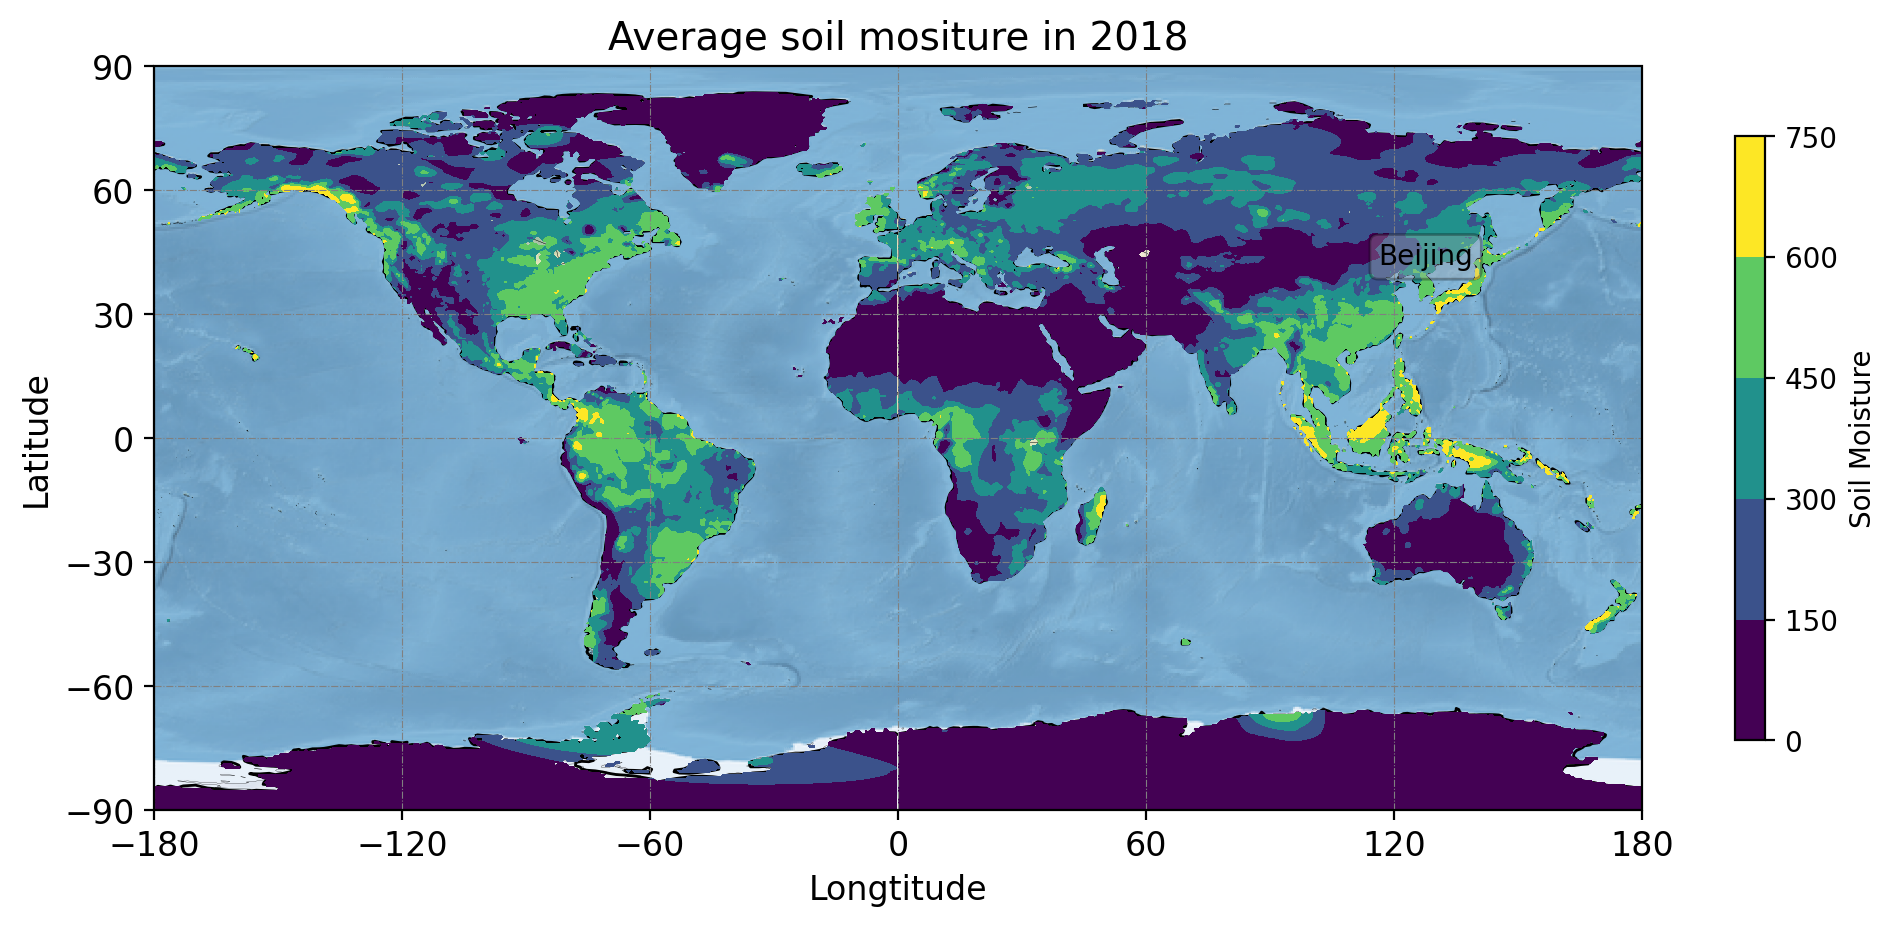

In [69]:
# create the figure
plt.figure(figsize=(12,8),dpi=200)
# set the projection of the figure
proj=ccrs.PlateCarree(central_longitude=0)
ax=plt.axes(projection=proj)
# set the range of map to global size
ax.stock_img()
ax.set_global()
# adding coastlines
ax.coastlines()
# adding gridlines
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=0.4,color="gray",linestyle="-.")
# adding borderlines over countries by using add_feature()
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='50m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1))
# plot the contour figure based on the soil data
Soil_data_2018.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={"shrink":0.5,"label":"Soil Moisture"})
# add x,y labels and scale 
plt.xticks(ticks=np.arange(-180,181,60),fontsize=12)
plt.yticks(ticks=np.arange(-90,91,30),fontsize=12)
plt.xlabel("Longtitude",fontsize=12)
plt.ylabel("Latitude",fontsize=12)
# add title for the picture 
plt.title("Average soil mositure in 2018", fontsize=14)
# add annotate for the picture 
bbox=dict(boxstyle="round", alpha=0.3, facecolor="0.7")
arrowprop=dict()
plt.annotate("Beijing",xy=(116.2,39.5),xytext=(116.2,42),bbox=bbox)
plt.show()

## 2.2 make map in a regional area

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


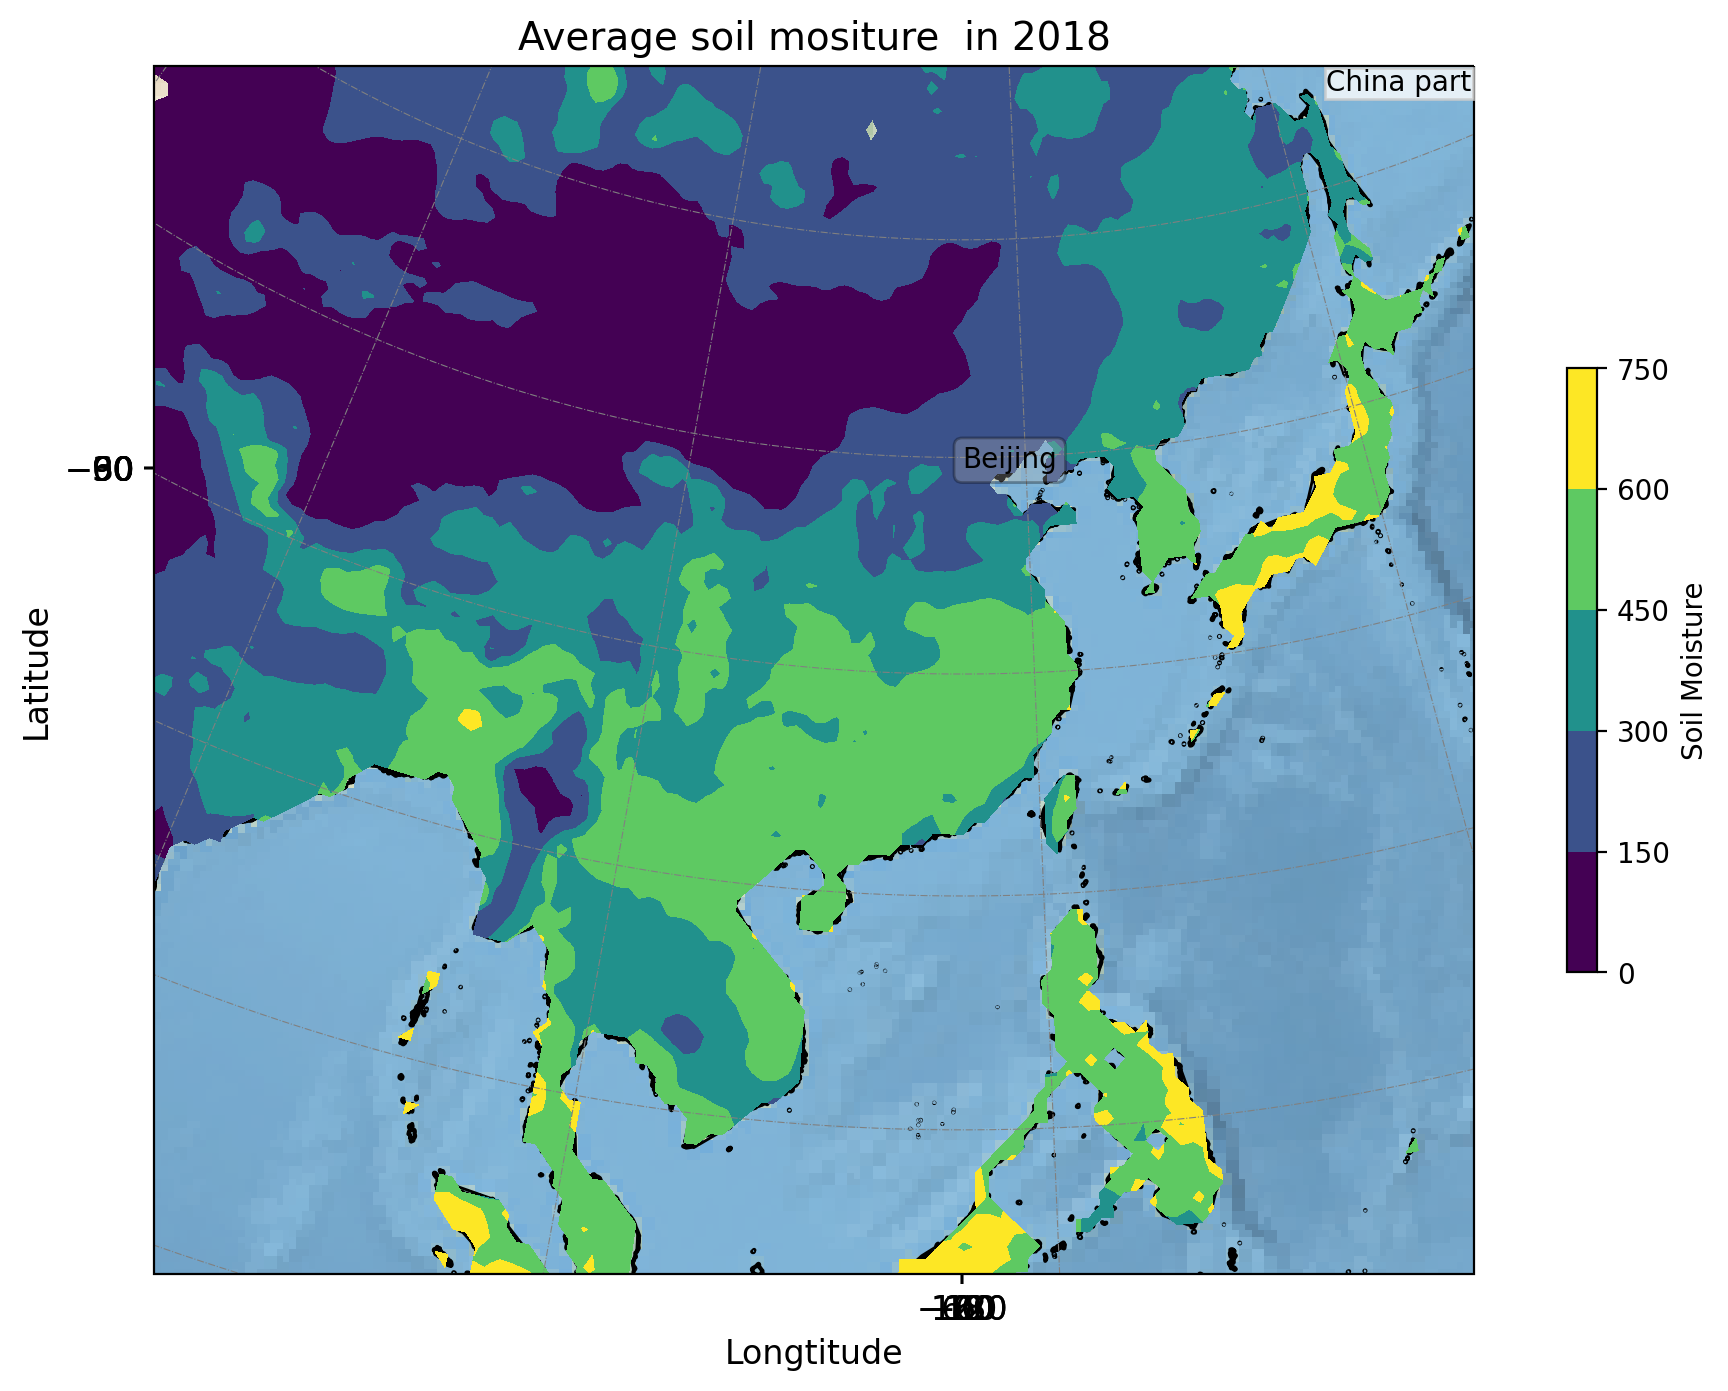

In [90]:
# create the figure
plt.figure(figsize=(12,8),dpi=200)
# set the projection of the figure
central_lon, central_lat = 116.2, 39.5 
proj =ccrs.LambertConformal(central_lon, central_lat) 
ax=plt.axes(projection=proj)
# set the range of map to global size
ax.stock_img()
ax.set_global()
# adding coastlines
ax.coastlines()
# adding gridlines
ax.gridlines(crs=ccrs.PlateCarree(),linewidth=0.4,color="gray",linestyle="-.")
# adding borderlines over countries by using add_feature()
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=1.5))
# set the regional drawing area
extent=[116.2-32,116.2+20,39.5-36,39.5+15]
ax.set_extent(extent)
# plot the contour figure based on the soil data
Soil_data_2018.plot.contourf(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={"shrink":0.5,"label":"Soil Moisture"})
# add Beijing as a point 
# add annotate for the picture 
bbox=dict(boxstyle="round", alpha=0.3, facecolor="0.7")
arrowprop=dict()
plt.annotate("Beijing",xy=(116.2,39.5),xytext=(116.2,42),bbox=bbox)
# add x,y labels and scale 
plt.xticks(ticks=np.arange(-180,181,60),fontsize=12)
plt.yticks(ticks=np.arange(-90,91,30),fontsize=12)
plt.xlabel("Longtitude",fontsize=12)
plt.ylabel("Latitude",fontsize=12)
# add title for the picture 
plt.title("Average soil mositure  in 2018", fontsize=14)
# add legend
plt.legend(title="China part",loc="best",fontsize=0.2)